# Extracting Image

In [ ]:
# Import libs

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Extracting ImageData for TRAIN data

imageTRAINgen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, shear_range=0.2, zoom_range=0.2)
training_set = imageTRAINgen.flow_from_directory('/content/drive/MyDrive/DataSets/Cat_and_Dog/train',
                                                 batch_size=32, target_size=(64, 64)
                                                 , class_mode='binary')

Found 557 images belonging to 2 classes.


In [ ]:
# Extracting ImageData for TEST data

imageTESTgen = ImageDataGenerator(rescale=(1./255), shear_range=0.2, horizontal_flip=True, zoom_range=0.2)
tesing_set = imageTESTgen.flow_from_directory('/content/drive/MyDrive/DataSets/Cat_and_Dog/test',
                                              target_size=(64, 64), batch_size=32
                                              , class_mode='binary')

Found 140 images belonging to 2 classes.


# Building Model

In [ ]:
# Building neural network blueprint

cnn = tf.keras.models.Sequential()

__First Layer__

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) # Convol feature layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # pooling layer

__Second Layer__

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))  # Convol feature layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # pooling layer

__Flattening Layer__

In [ ]:
cnn.add(tf.keras.layers.Flatten())  # Input 1D layer

__Creating ANN (Fully Connection) Layer__

In [ ]:
cnn.add(tf.keras.layers.Dense(128, activation='relu'))

__Output Layer__

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Training the CNN

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Improves model's performance

In [ ]:
cnn.fit(x=training_set, validation_data=tesing_set, epochs=25)

Epoch 1/25
18/18 [==============================] - 130s 7s/step - loss: 0.7321 - accuracy: 0.5135 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/25
18/18 [==============================] - 11s 614ms/step - loss: 0.6924 - accuracy: 0.5224 - val_loss: 0.6938 - val_accuracy: 0.5143
Epoch 3/25
18/18 [==============================] - 11s 590ms/step - loss: 0.6863 - accuracy: 0.5781 - val_loss: 0.7101 - val_accuracy: 0.5000
Epoch 4/25
18/18 [==============================] - 11s 613ms/step - loss: 0.6882 - accuracy: 0.5655 - val_loss: 0.6905 - val_accuracy: 0.5071
Epoch 5/25
18/18 [==============================] - 11s 605ms/step - loss: 0.6830 - accuracy: 0.5745 - val_loss: 0.6780 - val_accuracy: 0.5643
Epoch 6/25
18/18 [==============================] - 9s 524ms/step - loss: 0.6486 - accuracy: 0.6266 - val_loss: 0.6735 - val_accuracy: 0.5714
Epoch 7/25
18/18 [==============================] - 11s 605ms/step - loss: 0.6412 - accuracy: 0.6302 - val_loss: 0.6899 - val_accuracy: 0.5786
Ep

# Prediction

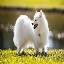

In [ ]:
import numpy as np
test_imagess = tf.keras.utils.load_img('/content/drive/MyDrive/DataSets/Cat_and_Dog/train/dogs/dog_109.jpg', target_size = (64, 64))
test_imagess

In [ ]:
test_imagess = tf.keras.utils.img_to_array(test_imagess)
test_imagess

array([[[159., 151.,   6.],
        [164., 153.,  12.],
        [168., 155.,  14.],
        ...,
        [189., 183.,  25.],
        [185., 182.,   9.],
        [188., 178.,   3.]],

       [[160., 153.,  13.],
        [164., 154.,  20.],
        [170., 156.,  21.],
        ...,
        [189., 182.,  32.],
        [185., 180.,  18.],
        [184., 175.,   8.]],

       [[162., 152.,  28.],
        [166., 154.,  34.],
        [171., 157.,  34.],
        ...,
        [177., 168.,  31.],
        [174., 166.,  21.],
        [177., 166.,  16.]],

       ...,

       [[225., 214.,  98.],
        [200., 193.,  50.],
        [173., 165.,  28.],
        ...,
        [138., 134.,   9.],
        [149., 138.,  49.],
        [149., 138.,  22.]],

       [[169., 158.,  32.],
        [157., 145.,   7.],
        [141., 131.,  10.],
        ...,
        [181., 178.,  21.],
        [189., 185.,  26.],
        [228., 219.,  90.]],

       [[146., 136.,   2.],
        [158., 146.,   8.],
        [181., 1

In [ ]:
test_imagess.shape

(64, 64, 3)

In [ ]:
test_imagess = np.expand_dims(test_imagess, axis=0)

In [ ]:
test_images

array([[[[[[ 69.,  99.,  47.],
           [ 69.,  96.,  45.],
           [ 64.,  91.,  38.],
           ...,
           [102., 130.,  72.],
           [106., 135.,  79.],
           [108., 132.,  84.]],

          [[ 67.,  98.,  41.],
           [ 69.,  96.,  41.],
           [ 63.,  93.,  39.],
           ...,
           [ 97., 128.,  69.],
           [107., 137.,  77.],
           [109., 133.,  81.]],

          [[ 68.,  97.,  43.],
           [ 67.,  96.,  42.],
           [ 64.,  93.,  39.],
           ...,
           [ 97., 126.,  68.],
           [107., 137.,  83.],
           [111., 138.,  85.]],

          ...,

          [[210., 214., 217.],
           [209., 213., 216.],
           [200., 204., 207.],
           ...,
           [ 47.,  67.,  30.],
           [ 49.,  74.,  32.],
           [ 49.,  74.,  32.]],

          [[204., 204., 204.],
           [195., 195., 195.],
           [205., 205., 205.],
           ...,
           [ 47.,  72.,  30.],
           [ 50.,  79.,  31.

In [ ]:
result = cnn.predict(test_imagess)

1/1 [==============================] - 0s 23ms/step


In [ ]:
if result[0][0] == 1:
  print('Dog')
elif result[0][0] == 0:
  print('Cat')

Dog
